# _PRN: 21070126039_ &emsp;_Name: Jainil Patel_&emsp; _Batch: AI/ML A2_

# Reinforcement Learning 

# Experiment 3

## Title: Implementation of dynamic programming algorithm: Value iteration

## Objective: Students will be able
- To understand a dynamic programming algorithm called Value iteration and
state values
- To implement value iteration policy in a 5×5 Maize environment and obtain
state value and policy table

## Importing the required libraries

## Import the necessary software libraries:

In [1]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values,test_agent
%matplotlib inline

C:\Users\jaini\Desktop\py venv\RL\RL\Lib\site-packages\pygame\pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
C:\Users\jaini\Desktop\py venv\RL\RL-Lab\Lab_4\utils.py:247: DeprecationWarning: invalid escape sequence '\p'
  plt.title("$\pi(s)$", size=16)
C:\Users\jaini\Desktop\py venv\RL\RL\Lib\site-packages\seaborn\utils.py:11: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Initialize the environment

In [2]:
env = Maze()

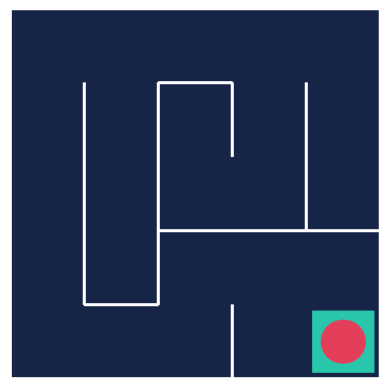

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [4]:
print(f"The state space is of type: {env.observation_space.nvec}")
print(f"The action state is of type: {env.action_space.n}")

The state space is of type: [5 5]
The action state is of type: 4


## Define the policy $\pi(\cdot|s)$

#### Create the policy $\pi(\cdot|s)$

In [5]:
policy_probs = np.full((5, 5, 4), 0.25)

In [6]:
policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [7]:
def policy(state):
    return policy_probs[state]

##### Actions and action space

In this environment, there are four different actions and they are represented by integers:

\begin{equation}
a \in \{0, 1, 2, 3\}
\end{equation}

- 0 -> move up
- 1 -> move right
- 2 -> move down
- 3 -> move left

To execute an action, simply pass it as an argument to the env.step method. Information about the action space is stored in the env.action_space property which is of Discrete(4) class. This means that in this case it only consists of an element in the range [0,4), unlike the state space seen above.


#### Test the policy with state (0, 0)

In [8]:
action_probabilities = policy((0,0))
for action, prob in zip(range(4), action_probabilities):
    print(f"Probability of taking action {action}: {prob}")

Probability of taking action 0: 0.25
Probability of taking action 1: 0.25
Probability of taking action 2: 0.25
Probability of taking action 3: 0.25


#### See how the random policy does in the maze

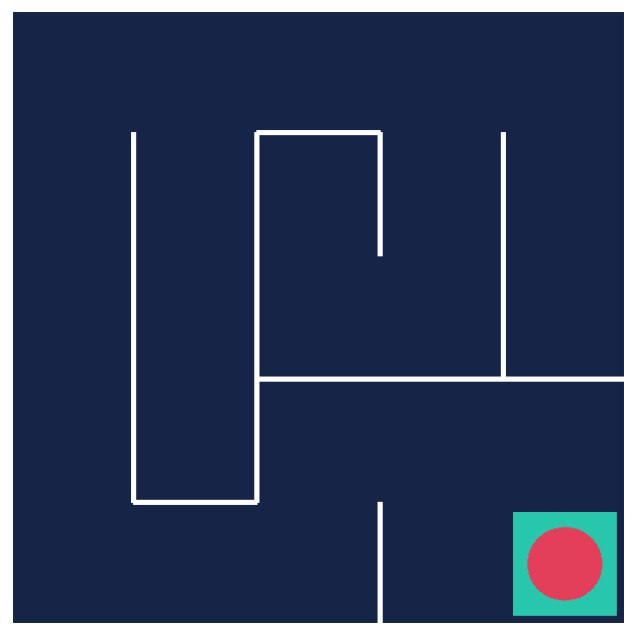

In [9]:
test_agent(env, policy, episodes=1)

#### Plot the policy

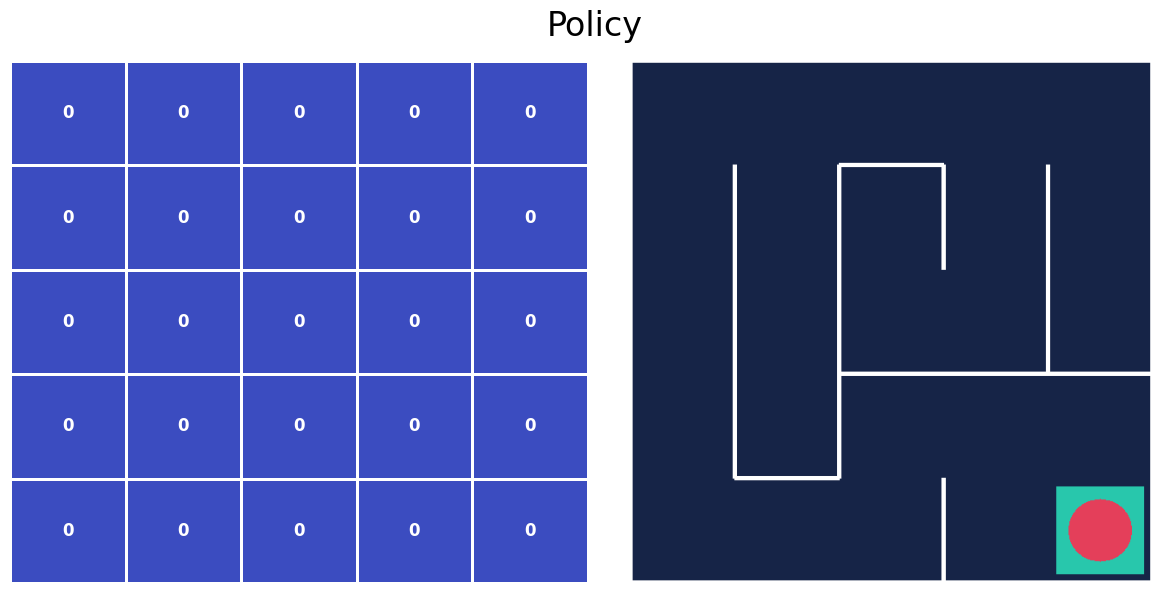

In [10]:
plot_policy(policy_probs, frame)

## Define value table $V(s)$

#### Create the $V(s)$ table

In [11]:
state_values = np.zeros(shape=(5,5))

#### Plot $V(s)$

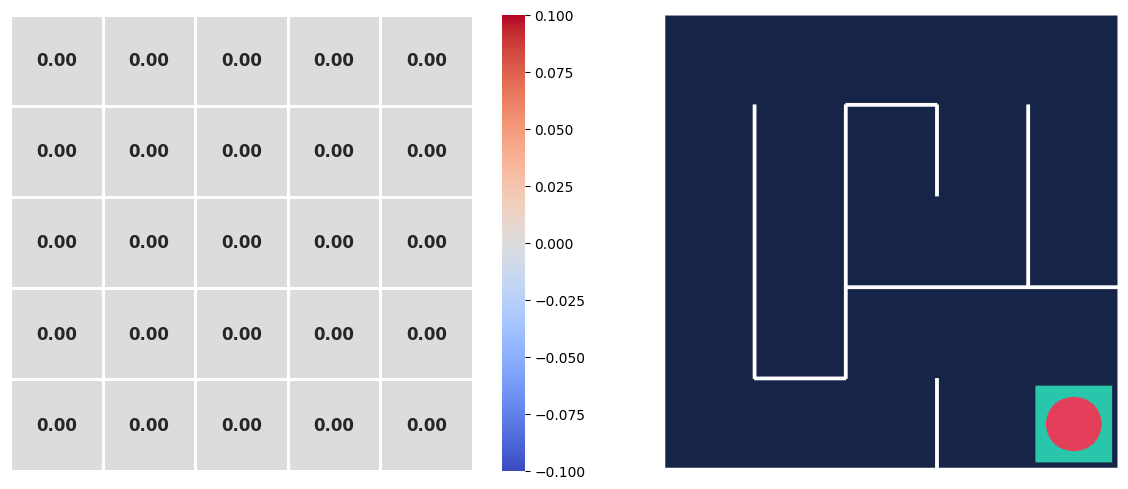

In [12]:
plot_values(state_values, frame)

## Implement the Value Iteration algorithm
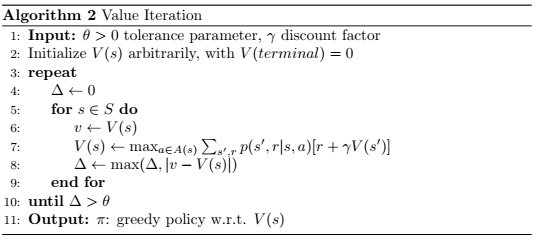

In [13]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):
    delta = float('inf')

    while delta > theta:
        delta = 0
        for row in range(5):
            for col in range(5):
                old_value = state_values[(row, col)]
                action_probs = None
                max_qsa = float('-inf')

                for action in range(4):
                    next_state, reward, _, _ = env.simulate_step((row, col), action)
                    qsa = reward + gamma * state_values[next_state]
                    if qsa > max_qsa:
                        max_qsa = qsa
                        action_probs = np.zeros(4)
                        action_probs[action] = 1.

                state_values[(row, col)] = max_qsa
                policy_probs[(row, col)] = action_probs

                delta = max(delta, abs(max_qsa - old_value))

In [14]:
value_iteration(policy_probs, state_values)

In [15]:
next_state, reward, _, _ = env.simulate_step((0, 0), 1)

In [16]:
next_state

(0, 1)

## Show results

#### Show resulting value table $V(s)$

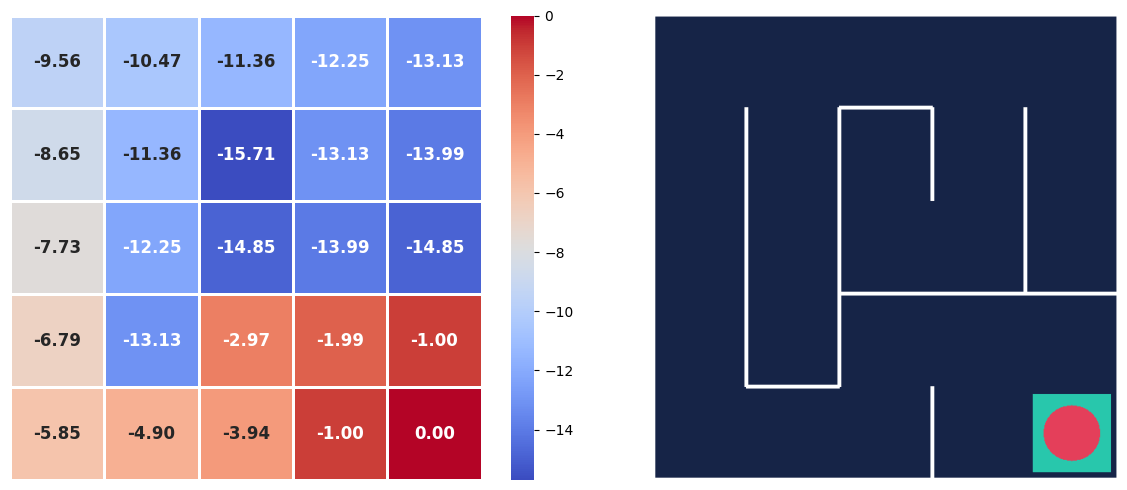

In [17]:
plot_values(state_values, frame)

#### Show resulting policy $\pi(\cdot|s)$

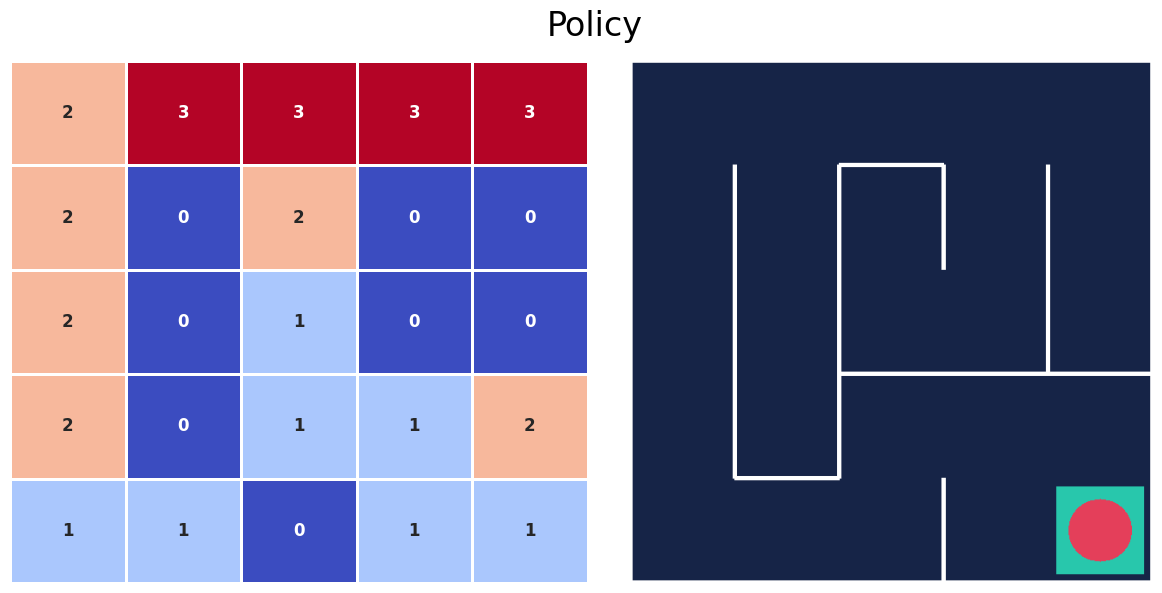

In [18]:
plot_policy(policy_probs, frame)

#### Test the resulting agent

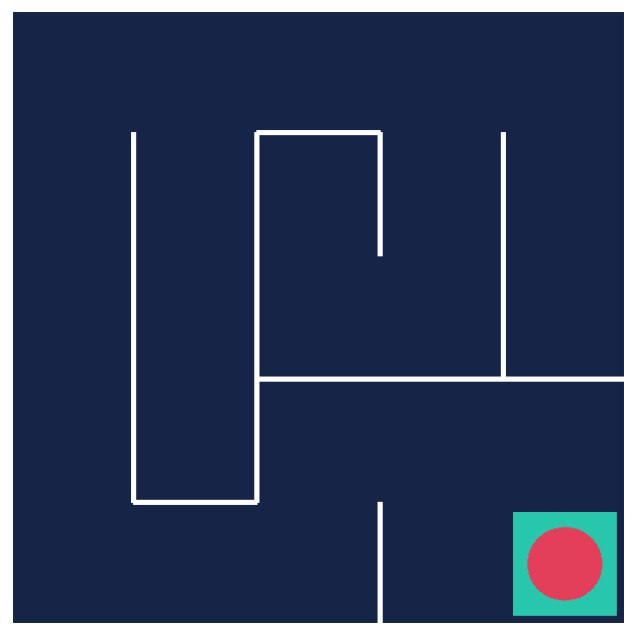

In [19]:
test_agent(env, policy, episodes = 2)

## Resources

[[1] Reinforcement Learning: An Introduction. Ch. 4: Dynamic Programming](https://web.stanford.edu/class/psych209/Readings/SuttonBartoIPRLBook2ndEd.pdf)